In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df= pd.read_csv("Fraud.csv", encoding='utf-8')

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Basic Statistics
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
# Missing Values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


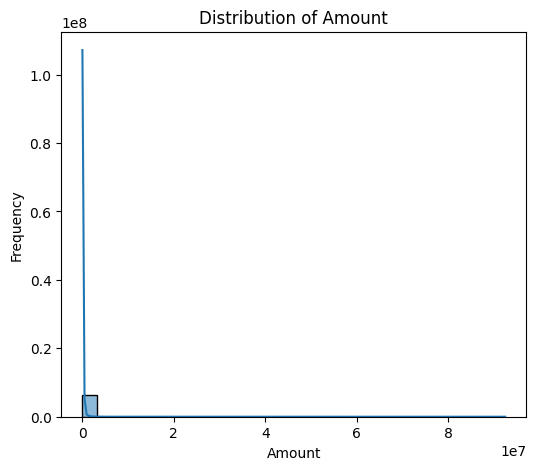

In [ ]:
# Data Visualization
# Histogram
plt.figure(figsize=(6, 5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

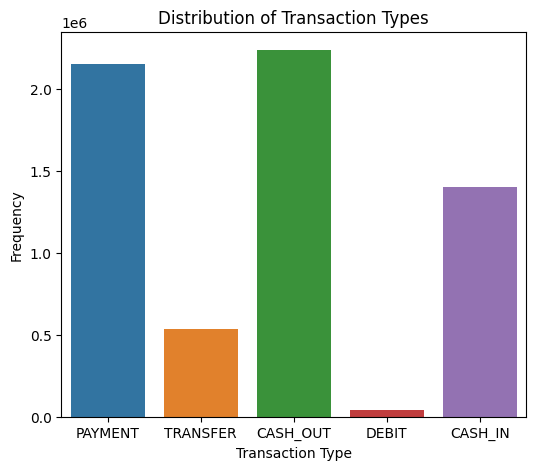

In [ ]:
# Bar plot for categorical variables
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.show()

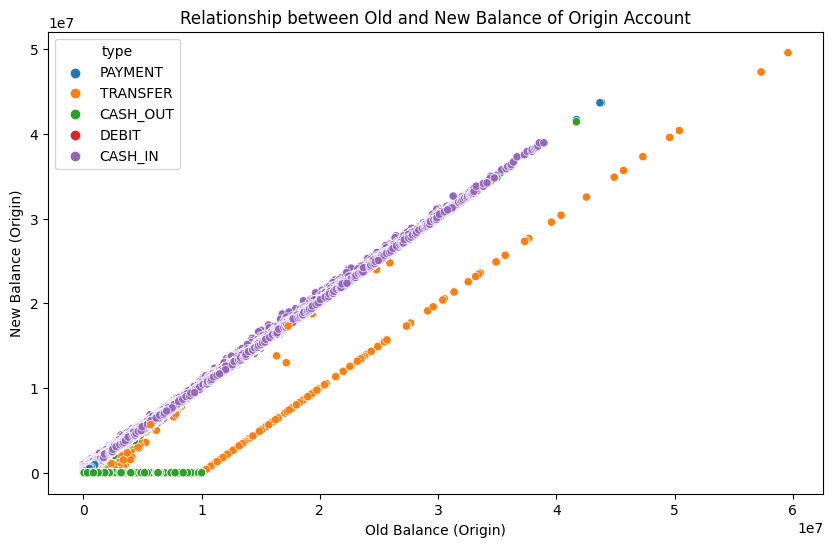

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='type')
plt.title('Relationship between Old and New Balance of Origin Account')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.show()

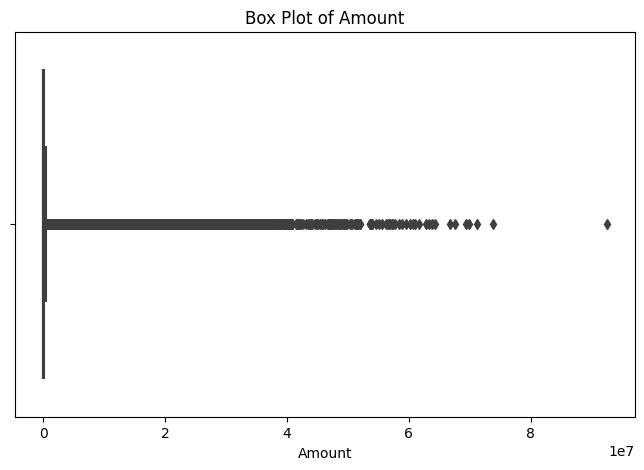

In [ ]:
# Box plot for potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='amount')
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

In [ ]:
# 1. Temporal Features
df['hour'] = (df['step'] % 24).astype(int)
df['day'] = (df['step'] // 24).astype(int)

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0


In [ ]:
# 2. Transaction Amount Features
df['amount_to_oldbalanceOrg'] = df['amount'] / (df['oldbalanceOrg'] + 1e-6)  # To avoid division by zero
df['amount_to_oldbalanceDest'] = df['amount'] / (df['oldbalanceDest'] + 1e-6)

# 3. Binary Categorical Features
df['isTransfer'] = (df['type'] == 'TRANSFER').astype(int)
df['isCashOut'] = (df['type'] == 'CASH_OUT').astype(int)

# 4. Transaction Amount Categories
amount_bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
amount_labels = ['<1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '>1M']
df['amount_category'] = pd.cut(df['amount'], bins=amount_bins, labels=amount_labels)

# Display the updated DataFrame with new features
print(df.head(5))


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  hour  \
0  M1979787155             0.0             0.0        0               0     1   
1  M2044282225             0.0             0.0        0               0     1   
2   C553264065             0.0             0.0        1               0     1   
3    C38997010         21182.0             0.0        1               0     1   
4  M1230701703             0.0             0.0        0               0     1   

   day  amount_to_oldbalanceOrg  amount_to_oldbalanceDest  isT

In [57]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [63]:
df_encoded = pd.get_dummies(df, columns=['amount_category'])

In [64]:
df = df_encoded

In [65]:
# Separate the features (X) and the target variable (y)
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # Drop the target and flagged fraud columns
y = df['isFraud']

In [66]:
# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [67]:
# Print the shapes of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4453834, 25) (4453834,)
Validation set shape: (954393, 25) (954393,)
Testing set shape: (954393, 25) (954393,)


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [69]:
# Create and train the model (using logistic regression as an example)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [71]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


c:\Users\mailf\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9987143660944705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5468838845430665


In [73]:

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[953166      0]
 [  1227      0]]


In [74]:
# Define the hyperparameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [77]:
# Create and train the model (using logistic regression as an example)
model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [79]:

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Create the final model with the best hyperparameters
final_model = LogisticRegression(random_state=42, C=best_params['C'])
final_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = final_model.predict(X_val)

# Evaluate the final model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, final_model.predict_proba(X_val)[:, 1])

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\mailf\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters: {'C': 10}
Accuracy: 0.9987143660944705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5468838845430665
Confusion Matrix:
[[953166      0]
 [  1227      0]]
